# **ROC Curve with Visualization API**
[ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
Scikit-learn定義了一個簡單的API，用於創建機器學習的可視化。該API的主要功能是無需重新計算即可進行快速繪圖和視覺調整。在此範例中，我們將通過比較ROC曲線來展示如何使用可視化API。<br>

## (一)載入資料以及訓練SVC

首先，我們載入`load_wine`，它主要為一個典型且簡單的多分類資料庫，並將它轉換為二進位制的分類問題。<br>
於訓練資料訓練一個SVC。svc = SVC(random_state=42)<br>

## (二)繪製ROC曲線

使用`sklearn.metrics.plot_roc_curve`來繪製ROC曲線，回傳的`svc_disp`對象使我們可以在以後的圖中繼續使用已經計算出的ROC曲線。<br>
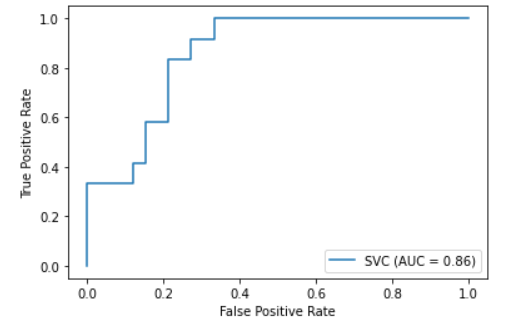


## (三)訓練一個隨機森林並且繪製ROC曲線

我們訓練一個隨機森林分類器並繪製出ROC曲線來比較先前用SVC繪製的ROC曲線，<br>
值得注意的是，`svc_disp`使用`plot`繪製曲線，而無需重新計算ROC曲線本身的值。<br>
此外，我們將alpha = 0.8傳遞給繪圖函數以調整曲線的alpha值。
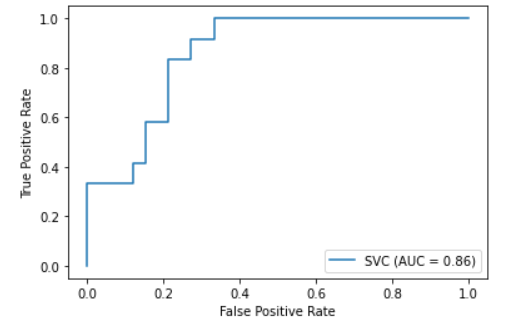


In [18]:
#1 載入資料以及訓練SVC
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
print(y)
y = y == 2
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #If train_size is also None, it will be set to 0.25.
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False

SVC(probability=True, random_state=42)

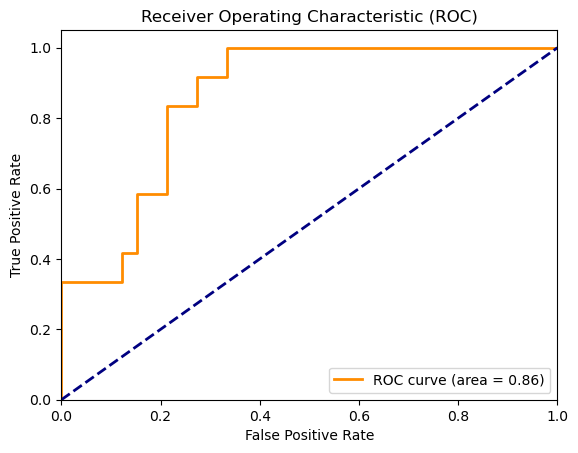

In [11]:
# Calculate ROC curve
y_scores = svc.predict_proba(X_test)[:, 1]  # Use predict_proba to get probability scores for positive class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# #2 繪製ROC曲線
# svc_disp = roc_curve(X_test, y_test)
# plt.show()

# 繪製ROC曲線
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

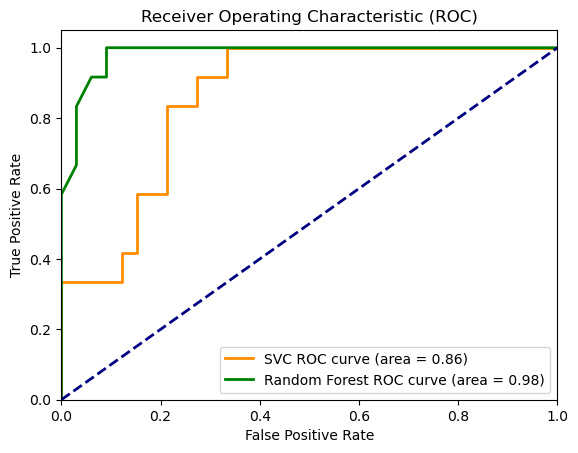

In [20]:
#3 訓練一個隨機森林並且繪製ROC曲線

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
# ax = plt.gca()
# svc_disp.plot(ax=ax, alpha=0.8)
# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
# plt.show()

# Calculate ROC curve for SVC
svc_scores = svc.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_scores)
roc_auc_svc = auc(fpr_svc, tpr_svc)


rfc_scores = rfc.predict_proba(X_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_scores)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plot ROC curves for both classifiers
plt.figure()
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'SVC ROC curve (area = {roc_auc_svc:.2f})')
plt.plot(fpr_rfc, tpr_rfc, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
